# ML Lab03 : Linear regression의 cost 최소화 TensorFlow 구현

## Simplified hypothesis

$$H(x) = Wx $$
$$cost(W) = \frac{1}{m}\sum_{i=1}^m (W(x_i)-y_i)^2 $$

H(x) = Wx + b에서 계산의 간편을 위해 + b를 지우고 H(x) = Wx로 식을 구성한다.

이렇게 나타면 cost는 W의 함수가 된다. W 값이 바뀌게 되면 cost가 바뀌게 된다.
cost를 minmize하자는 것은 cost가 최저가 되는 W값을 찾자는 것이다.


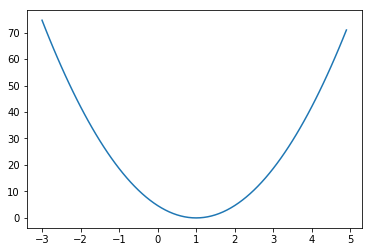

In [1]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))

sess = tf.Session()

sess.run(tf.global_variables_initializer())

W_val = []
cost_val = []

for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
plt.plot(W_val, cost_val)
plt.show()


## Gradient descent

$$cost(W) = \frac{1}{m}\sum_{i=1}^m (W(x_i)-y_i)^2 $$

미분을 하여 기울기를 구한다.
기울기가 +가 될 경우 w값은 - 방향으로 움직여야하고,
기울기가 -가 될 경우 w값은 + 방향으로 움직여야한다.

다음과 같이 이동을 하게 하려면 W에서 미분을 한 값을 빼주면 된다.

$$W := W - \alpha\frac{1}{m}\sum_{i=1}^m (W(x_i)-y_i)x_i$$

알파는 학습 rate라고 한다.

```python
# Minimize: Gradient Descent using derivative:
# W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W*X -Y) * X)
descent = W - learning_rate * gradient
update = W.assign(desent)
```

In [2]:
import tensorflow as tf

x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X * W

# cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

#Minimize
learning_rate = 0.1
gradient = tf.reduce_mean((W*X -Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

# Minimize
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
# train = optimizer.minimize(cost)
# 위의 mimizie와 동일한 연산과정을 거친다.

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(21):
    # step이 진행될 때마다 update를 실행 
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

(0, 5.426613, array([-0.07835323], dtype=float32))
(1, 1.5435702, array([0.42487824], dtype=float32))
(2, 0.43905982, array([0.6932684], dtype=float32))
(3, 0.124888174, array([0.8364098], dtype=float32))
(4, 0.03552373, array([0.9127519], dtype=float32))
(5, 0.010104531, array([0.95346767], dtype=float32))
(6, 0.0028741758, array([0.9751828], dtype=float32))
(7, 0.0008175464, array([0.98676413], dtype=float32))
(8, 0.00023254399, array([0.9929409], dtype=float32))
(9, 6.614641e-05, array([0.99623513], dtype=float32))
(10, 1.8814217e-05, array([0.9979921], dtype=float32))
(11, 5.3511735e-06, array([0.99892914], dtype=float32))
(12, 1.5220904e-06, array([0.99942887], dtype=float32))
(13, 4.3305428e-07, array([0.99969536], dtype=float32))
(14, 1.2316353e-07, array([0.9998375], dtype=float32))
(15, 3.502997e-08, array([0.99991333], dtype=float32))
(16, 9.983675e-09, array([0.99995375], dtype=float32))
(17, 2.8357523e-09, array([0.9999753], dtype=float32))
(18, 8.1132256e-10, array([0.9999

### Gradient descent 확인

W=5일 때 Output을 확인한다.

In [3]:
import tensorflow as tf

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(5.0)

hypothesis = X * W

# cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

#Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(10):
    print(step, sess.run(W))
    sess.run(train)

(0, 5.0)
(1, 1.2666664)
(2, 1.0177778)
(3, 1.0011852)
(4, 1.000079)
(5, 1.0000052)
(6, 1.0000004)
(7, 1.0)
(8, 1.0)
(9, 1.0)


In [4]:
import tensorflow as tf

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(-3.0)

hypothesis = X * W

# cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

#Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(10):
    print(step, sess.run(W))
    sess.run(train)

(0, -3.0)
(1, 0.7333336)
(2, 0.98222226)
(3, 0.9988148)
(4, 0.99992096)
(5, 0.9999947)
(6, 0.99999964)
(7, 0.99999994)
(8, 1.0)
(9, 1.0)


## Optional: compute_gradient and apply_gradient

gradient를 손대고 싶어질 수 있는 경우가 있다.  
gradient를 임의로 수정하고자 하는 경우.

In [5]:
import tensorflow as tf

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(5.)

hypothesis = X * W

gradient = tf.reduce_mean((W*X -Y) * X) * 2

# cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
#Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
#바로 minimize를 하라고 하지않고 gradient 계산 값을 달라고 한다.
gvs = optimizer.compute_gradients(cost,[W])

#이 사이에 gvs를 가공하여 gradient를 변경

apply_gradients = optimizer.apply_gradients(gvs)

train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

#자동으로 계산된 gradient와 수식으로 계산한 gradient가 같은 값인지 확인해보자
for step in range(100):
    print(step, sess.run([gradient, W, gvs]))
    sess.run(apply_gradients)

(0, [37.333332, 5.0, [(37.333336, 5.0)]])
(1, [33.84889, 4.6266665, [(33.84889, 4.6266665)]])
(2, [30.689657, 4.2881775, [(30.689657, 4.2881775)]])
(3, [27.825287, 3.9812808, [(27.825287, 3.9812808)]])
(4, [25.228262, 3.703028, [(25.228262, 3.703028)]])
(5, [22.873621, 3.4507453, [(22.873623, 3.4507453)]])
(6, [20.738752, 3.2220092, [(20.73875, 3.2220092)]])
(7, [18.803137, 3.0146217, [(18.803137, 3.0146217)]])
(8, [17.048176, 2.8265903, [(17.048176, 2.8265903)]])
(9, [15.457013, 2.6561086, [(15.457014, 2.6561086)]])
(10, [14.014359, 2.5015385, [(14.01436, 2.5015385)]])
(11, [12.706352, 2.361395, [(12.706352, 2.361395)]])
(12, [11.520427, 2.2343314, [(11.520427, 2.2343314)]])
(13, [10.445186, 2.119127, [(10.445185, 2.119127)]])
(14, [9.470302, 2.0146751, [(9.470302, 2.0146751)]])
(15, [8.586407, 1.9199722, [(8.586407, 1.9199722)]])
(16, [7.785009, 1.8341081, [(7.785009, 1.8341081)]])
(17, [7.0584083, 1.756258, [(7.0584083, 1.756258)]])
(18, [6.399624, 1.685674, [(6.399624, 1.685674)]])